In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("D:/Data Analysis/stroke/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [216]:
df.shape

(5110, 12)

In [217]:
df.size

61320

In [218]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [220]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

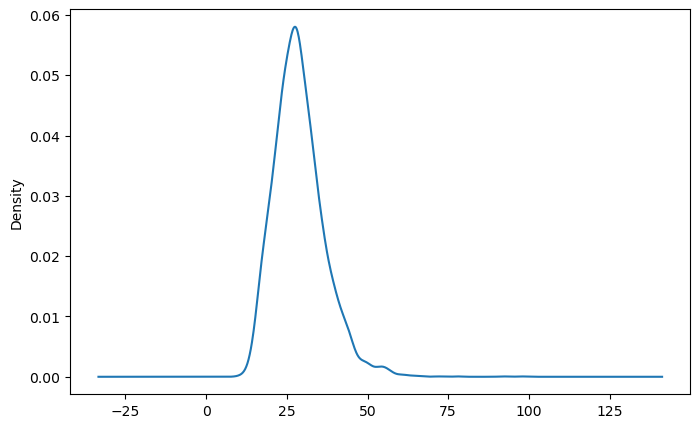

In [221]:
# Checking the distribution of missing plot-bmi
plt.figure(figsize=(8,5))
df['bmi'].plot(kind='kde')
plt.show()

# Populating the missing values

In [222]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Removing un-necessary sets

In [223]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# EDA

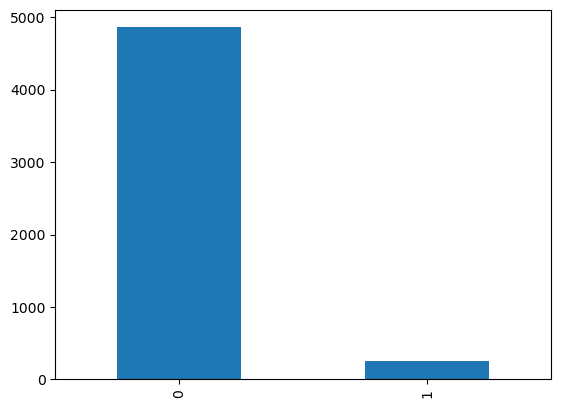

In [224]:
df['stroke'].value_counts().plot(kind='bar')
plt.show()

# Checking for Outliers in categorical columns

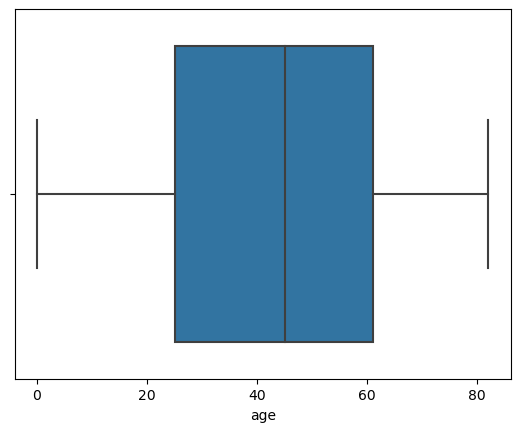

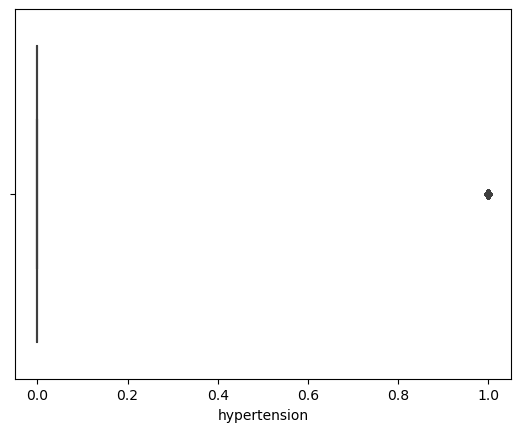

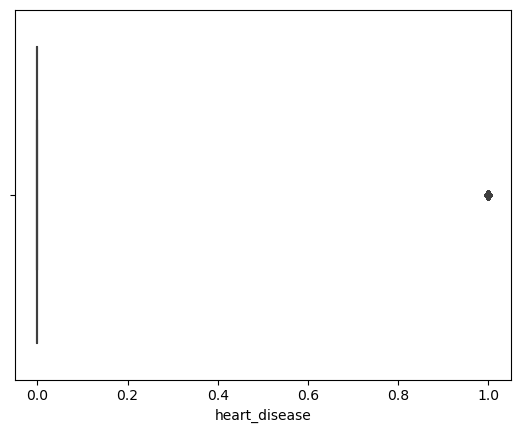

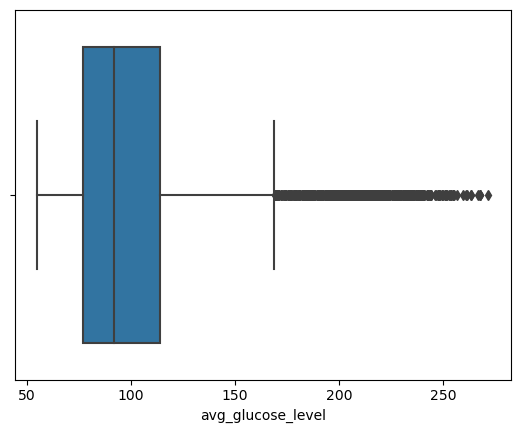

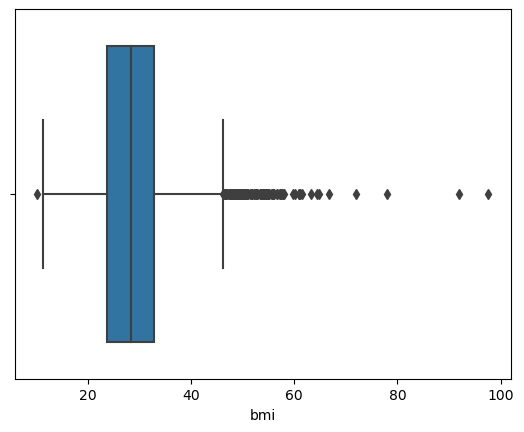

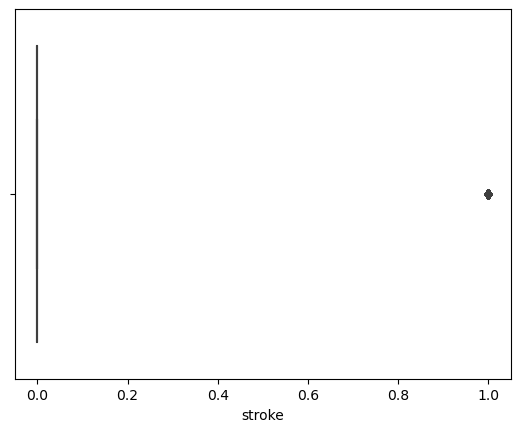

In [225]:
num=df.select_dtypes(exclude='object')
for i in num.columns:
    sns.boxplot(data=num,x=i)
    plt.show()

# Gender

In [226]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

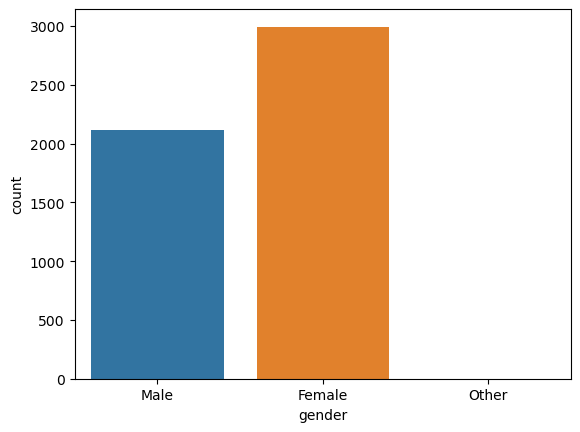

In [227]:
sns.countplot(data=df,x='gender')
plt.show()

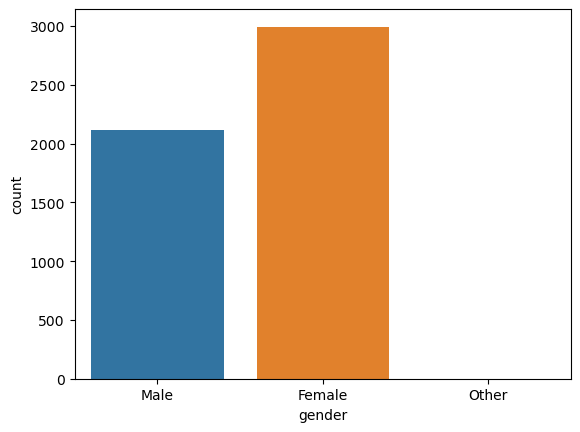

In [228]:
sns.countplot(data=df,x='gender')
plt.show()

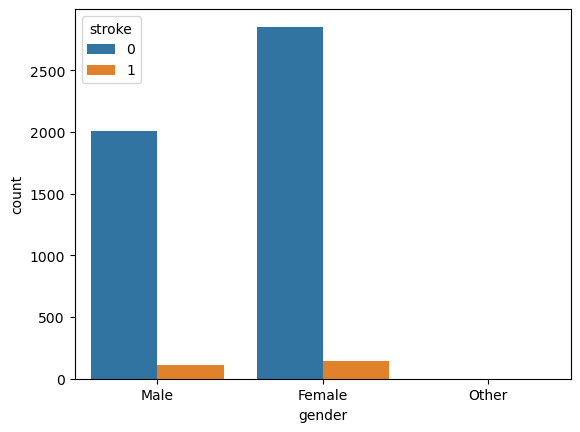

In [229]:
sns.countplot(data=df,x='gender',hue='stroke')
plt.show()

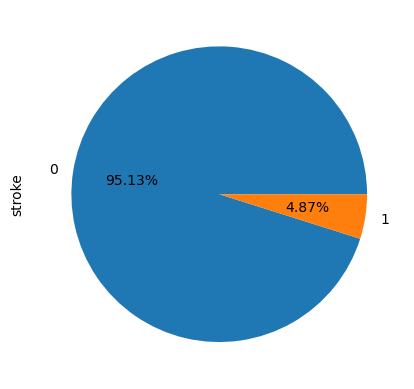

In [230]:
df['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

# Age

In [231]:
df.groupby('gender').mean()[['age','stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


More Men had strokes than women

# Ever-Married

In [232]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

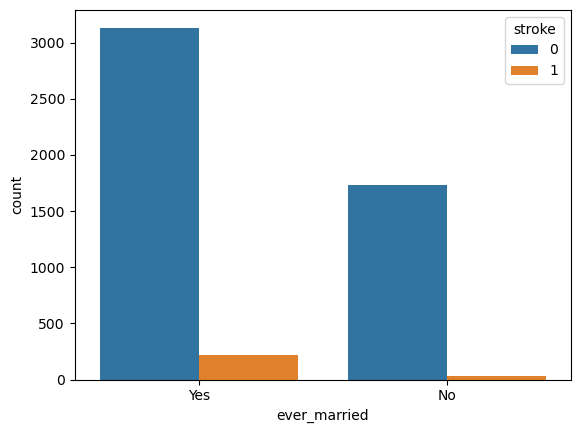

In [233]:
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()

# Work Type

In [234]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [235]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

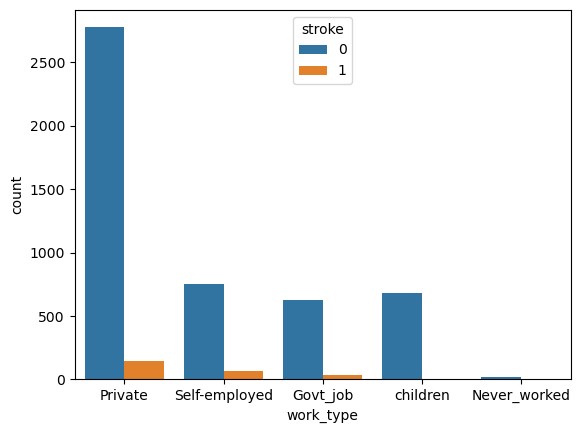

In [236]:
sns.countplot(data=df,x='work_type',hue='stroke')
plt.show()

# Residence Type

In [237]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [238]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

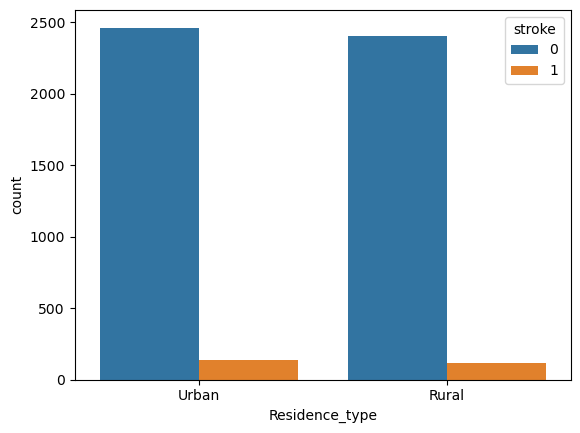

In [239]:
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.show()

# Smoking Features

In [240]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

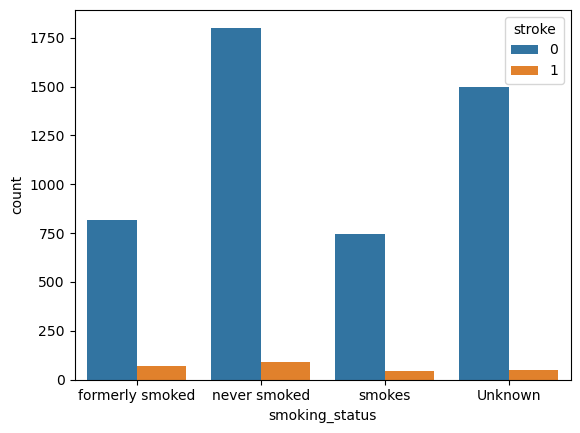

In [241]:
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()

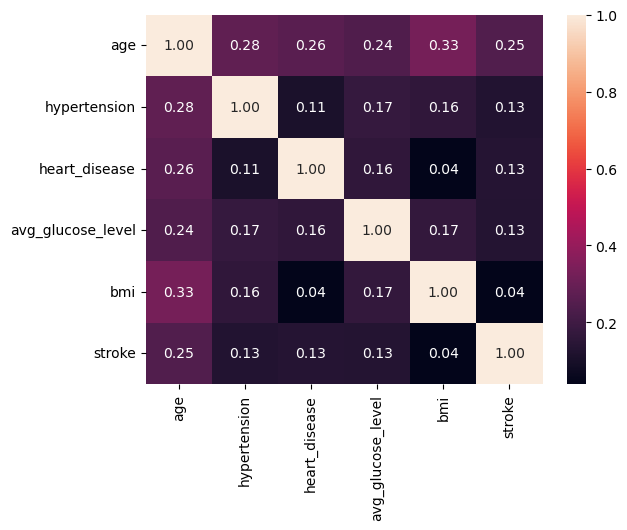

In [242]:
sns.heatmap(data=df.corr(),annot=True,fmt='.2f')
plt.show()

# Encoding the categorical variables

In [243]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [244]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [245]:
label=LabelEncoder()
df['gender']=label.fit_transform(df['gender'])
df['ever_married']=label.fit_transform(df['ever_married'])
df['work_type']=label.fit_transform(df['work_type'])
df['Residence_type']=label.fit_transform(df['Residence_type'])
df['smoking_status']=label.fit_transform(df['smoking_status'])

In [246]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x,y)

[[  1.          67.           0.         ... 228.69        36.6
    1.        ]
 [  0.          61.           0.         ... 202.21        28.89323691
    2.        ]
 [  1.          80.           0.         ... 105.92        32.5
    2.        ]
 ...
 [  0.          35.           0.         ...  82.99        30.6
    2.        ]
 [  1.          51.           0.         ... 166.29        25.6
    1.        ]
 [  0.          44.           0.         ...  85.28        26.2
    0.        ]] [1 1 1 ... 0 0 0]


In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(5110, 10) (4088, 10) (1022, 10)


In [248]:
models=[KNeighborsClassifier(n_neighbors=11),GaussianNB(),SVC(),LogisticRegression(),DecisionTreeClassifier(max_depth=3),RandomForestClassifier()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print("{}:{}".format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=11):93.9334637964775

GaussianNB():86.69275929549902

SVC():93.9334637964775

LogisticRegression():93.9334637964775

DecisionTreeClassifier(max_depth=3):94.03131115459882

RandomForestClassifier():93.73776908023484



Of the above analysis the model's KNN and RandomForest shows the highest accuracy score among others.Further anlaysis are been conducted on these two.

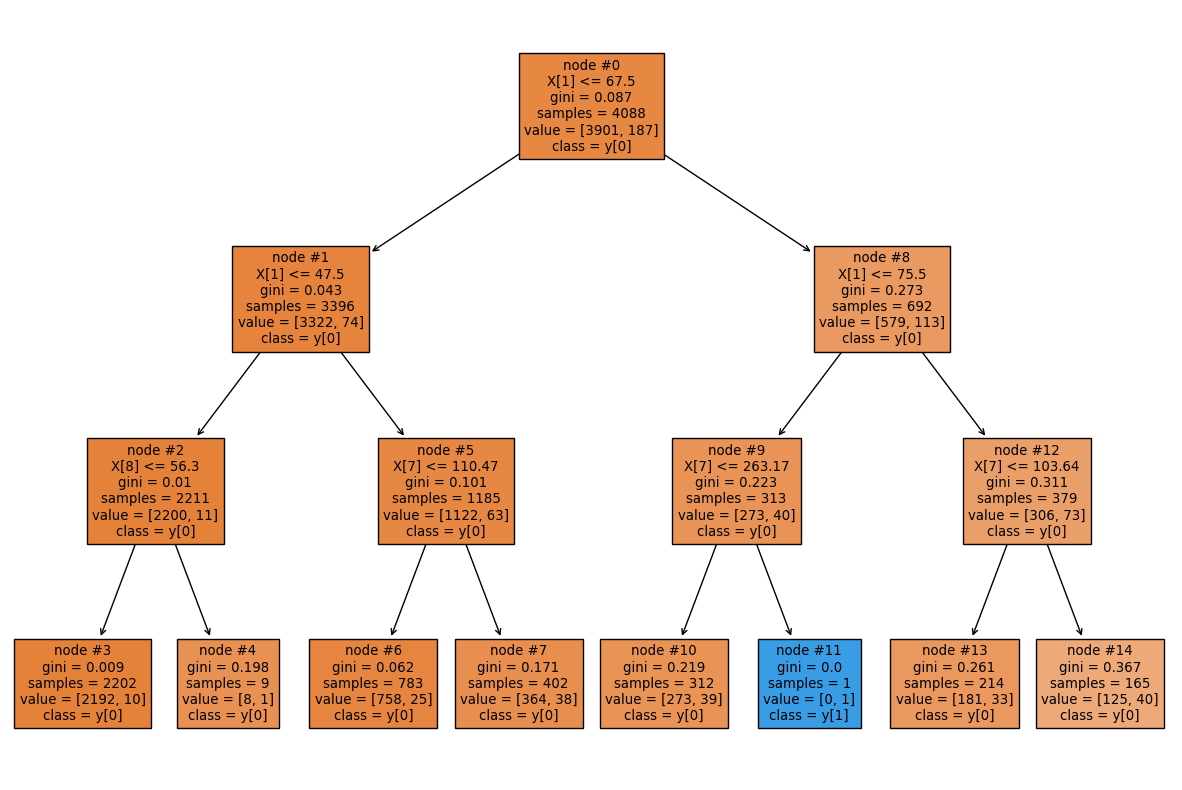

In [249]:
classifier=DecisionTreeClassifier(max_depth=3)
classifier.fit(x_train,y_train)
fig=plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



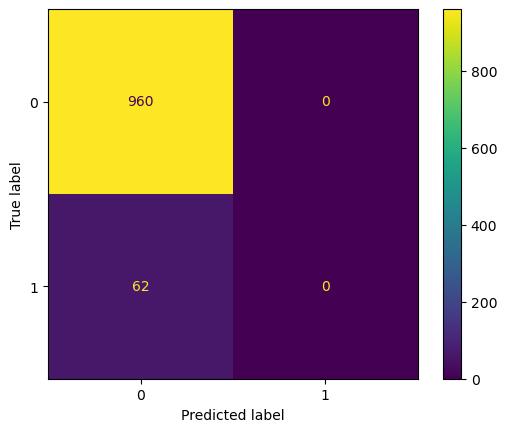

In [250]:
# KNN
model1=models[0] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



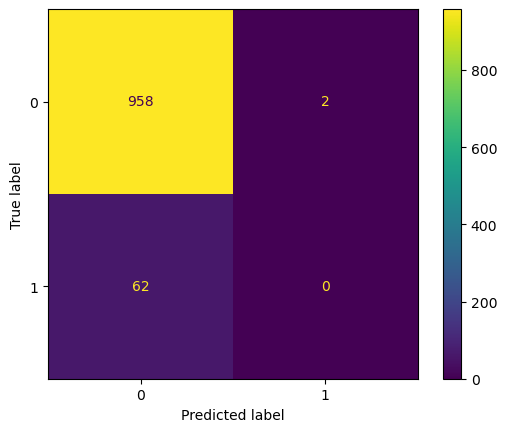

In [251]:
# RandomForest
model1=models[5] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

Machine Learning model for Stroke prediction a healthcare dataset-This was a supervised learning classification type problem. 

Initial Analysis: First understood the given dataset. Looked through its structure, identified the datatypes of various columns and got a basic idea of the dataset to proceed further.
Data Cleaning: Look out for visible data quality issues and rectify them. Checked for Nan data, duplicate data and convert certain columns to required datatypes.
Exploratory Data Analysis: Carried out various operations like univariate, bivariate analysis and then generate useful insights from them.
Visualization: Used matplotlib, seaborn to plot various graphs for better visualization and understanding.

ML modelling:
Then applied some ML classification algorithm which were Logistic Regression, KNN classifier, Decision Tree, Random Forest & evaluated the model with the help of Accuracy score, classification report, confusion matrix.

After analyzing the various parameters, here are a few things that we can conclude.
Above we have seen that, first of all there are more female genders compared to males. More men are having stroke attack compared to woman. We have also analyzed their work type and residence in which we found that private one was the highest with the chance of stroke attack.

Conclusion:
This project hence helps to predict the stroke risk using prediction model and provide personalized warning and the lifestyle correction message.
By doing so, it also urges medical users to strengthen the motivation of health management and induce changes in their health behaviors.

Recommendation:
The results highlight the potential value of expanding the use of ML in clinical practice.